
# Clustering to do *color quantization* using K-Means


First, we review the clustering example from lecture. We will perform a pixel-wise Vector Quantization (VQ) of an image of the summer palace (China), reducing the number of colors required to show the image from 96,615
unique colors to a smaller number, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to find k color clusters. In the image processing literature, the **codebook** obtained from K-means (the cluster centers) is called the color palette. Using an unsigned 8 bit integer (called a byte), up to 256 colors can be addressed (numbered 0-255), whereas an RGB encoding requires 3 bytes per pixel. The GIF file format, for example, uses such a palette.

For comparison, a quantized image using a random codebook (colors picked up randomly) is also shown.

In [1]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from scipy import ndimage
import imageio
from time import time

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load image and transform to a 2D numpy array which is w*h rows and d columns.
h, w, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

Text(0, 0.5, 'blue')

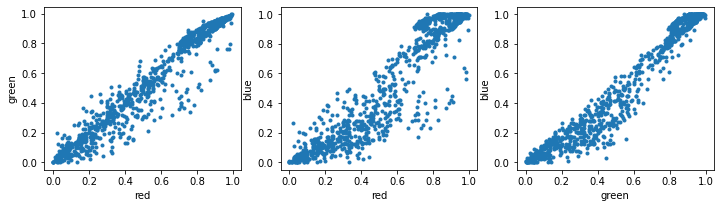

In [2]:
# Let's plot the color intensity values for a sample of 1000 pixels

# First, let's sample 1000 pixels randomly
image_array_sample = shuffle(image_array, random_state=0)[:1000]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

axes[0].plot(image_array_sample[:,0], image_array_sample[:,1], '.')
axes[0].set_xlabel('red')
axes[0].set_ylabel('green')

axes[1].plot(image_array_sample[:,0], image_array_sample[:,2], '.')
axes[1].set_xlabel('red')
axes[1].set_ylabel('blue')

axes[2].plot(image_array_sample[:,1], image_array_sample[:,2], '.')
axes[2].set_xlabel('green')
axes[2].set_ylabel('blue')

In [3]:
# We will use this function later to recreate a full color image given a particular codebook.

def recreate_image(codebook, labels, h, w):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((h, w, d))
    label_idx = 0
    for i in range(h):
        for j in range(w):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [4]:
n_colors = 10

# Here with use the KMeans algorithm to cluster a subset of our
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))
print('np.max(labels)',np.max(labels))

codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))
print('np.max(labels_random)',np.max(labels_random))

Fitting model on a small sub-sample of the data
done in 0.222s.
Predicting color indices on the full image (k-means)
done in 0.005s.
np.max(labels) 9
Predicting color indices on the full image (random)
done in 0.005s.
np.max(labels_random) 9


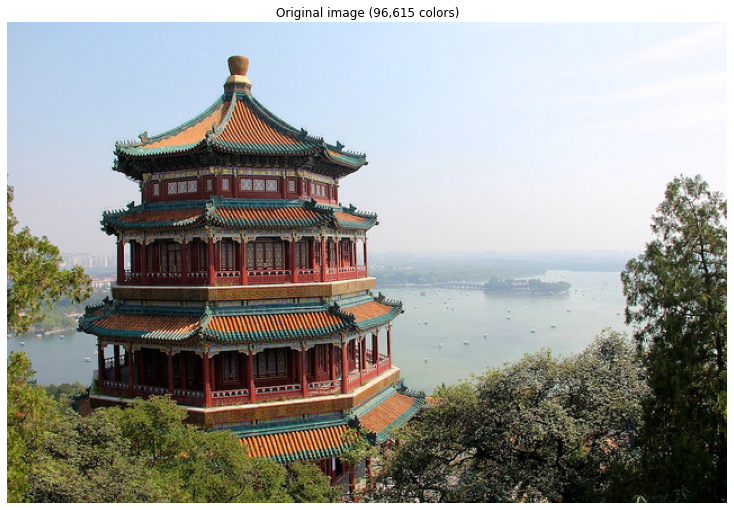

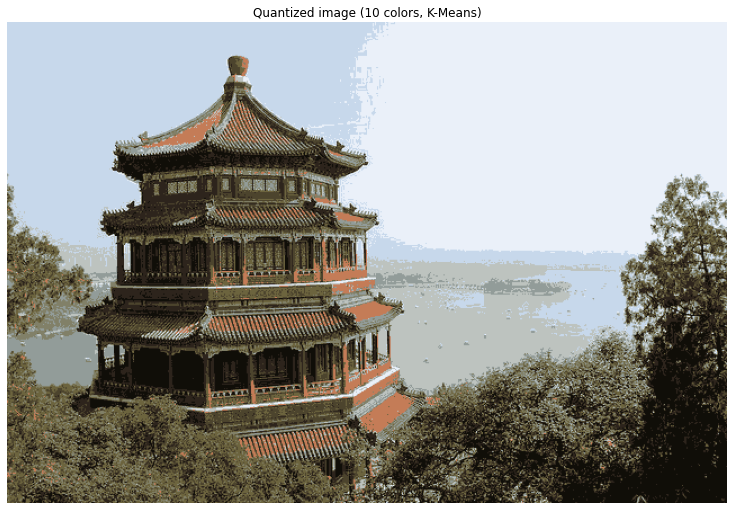

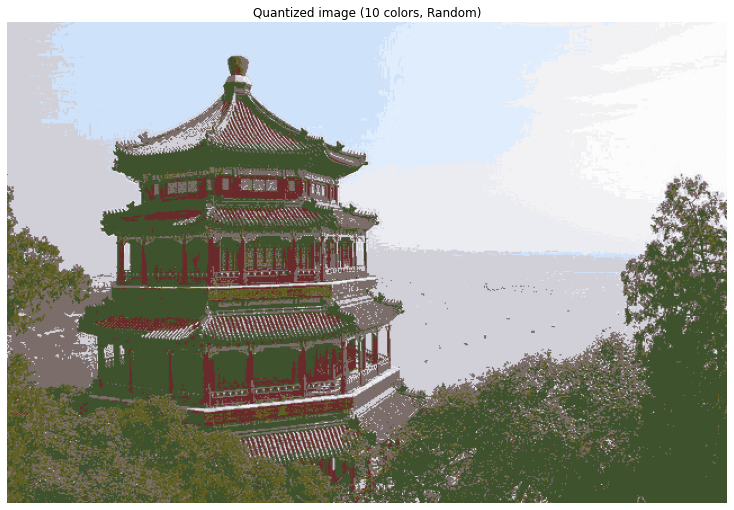

In [5]:
# Display all results, alongside original image
figsize = (10,10)
plt.figure(1,figsize=figsize)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2,figsize=figsize)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (%d colors, K-Means)' % n_colors)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, h, w))

plt.figure(3,figsize=figsize)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (%d colors, Random)' % n_colors)
plt.imshow(recreate_image(codebook_random, labels_random, h, w))
plt.show()

## Color quantization for coffee bean detection and localization

We now want to use color quantization to segment an image into specific objects based on their color.

We now load the image `beans` as so:

```
beans = imageio.imread('data/IMG_4272.JPG')
```

This is a copy of the code above modified to use the `beans` data (instead of the `china` data). Below we show the original image and a color quantized image.

In [6]:
beans = imageio.imread('coffee_beans.JPG')

beans = np.array(beans, dtype=np.float64) / 255

# Load image and transform to a 2D numpy array which is w*h rows and d columns.
h, w, d = beans_shape = tuple(beans.shape)
assert d == 3
image_array = np.reshape(beans, (w * h, d))

## Q1 Choose `n_colors` to perform well in subsequent tasks.

We have a goal of choosing `n_colors` (the number of clusters, *k*) which will make the task of detecting beans easiest. So change this variable and re-run the following cells until you have a good value.

In [7]:
# Your answer here
n_colors = 7

In [8]:
# Here with use the KMeans algorithm to cluster a subset of our
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))
print('np.max(labels)',np.max(labels))

Fitting model on a small sub-sample of the data
done in 0.237s.
Predicting color indices on the full image (k-means)
done in 0.057s.
np.max(labels) 6


In [9]:
# For this task (bean detection) it will be useful to also plot the labels, so 
# we shape them to have the same size as our images.

labels_shaped = labels.copy()
labels_shaped.shape = (h,w)

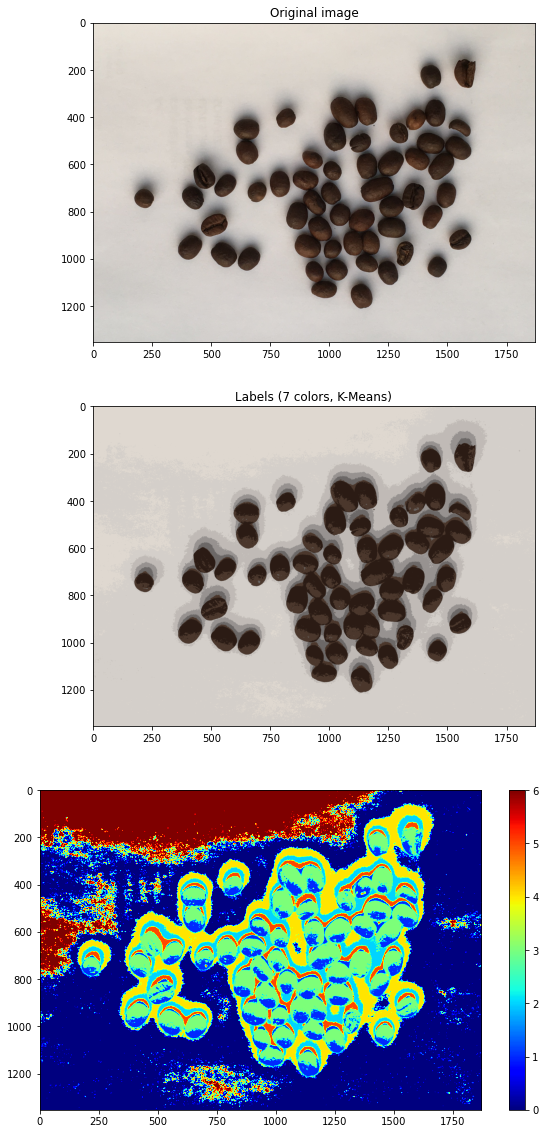

In [10]:
# Plot the original, reconstructed and label images

fig, axes = plt.subplots(nrows=3, figsize=(10,20))
axes[0].set_title('Original image')
axes[0].imshow(beans)

axes[1].set_title('Quantized image (%d colors, K-Means)' % n_colors)
axes[1].imshow(recreate_image(kmeans.cluster_centers_, labels, h, w))

axes[1].set_title('Labels (%d colors, K-Means)' % n_colors)
cax=axes[2].imshow(labels_shaped, cmap='jet')
fig.colorbar(cax);

### Image processing for bean detection

Now that we have quantized our colors, perhaps we can use a specific quantized color to simply an image analysis task.

In this case, our "labels" indicate which cluster each pixel belongs to.

## Q2 Based on the label plot above, pick the label number with the best value for our couting task.

Put this in the `best_label` variable.

In [22]:
# Your answer here
best_label = 1

## Q3 The following steps do blurring, thresholding, erosion, and connected components labeling to "clean up" the labels. Run and adjust these steps, if necessary, to make an image showing the beans with their centers roughly like this:

(It is not required, or expected, that your image will look exactly like this.)

See if you can get even better bean localizations.

![bean-centers.png](bean-centers.png)

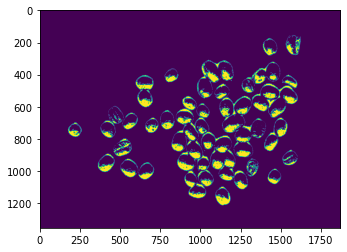

In [23]:
thresholded = labels_shaped==best_label
plt.imshow(thresholded)

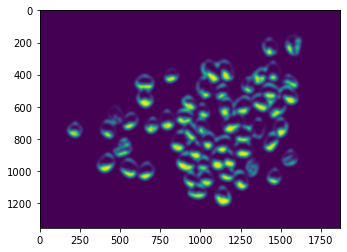

In [24]:
im = ndimage.gaussian_filter(thresholded.astype(np.float64), sigma=8.0)
plt.imshow(im)

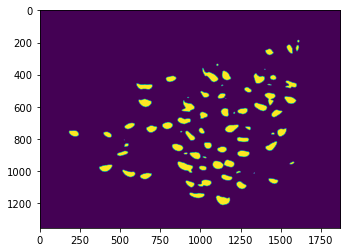

In [25]:
thresholded = im > 0.5
plt.imshow(thresholded)

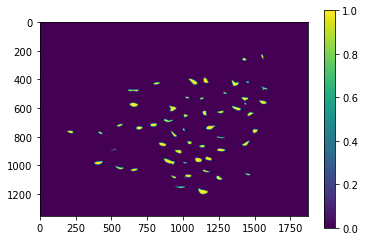

In [26]:
eroded = thresholded
for i in range(10):
    eroded = ndimage.binary_erosion(eroded)
plt.imshow(eroded.astype(np.uint8))
plt.colorbar();

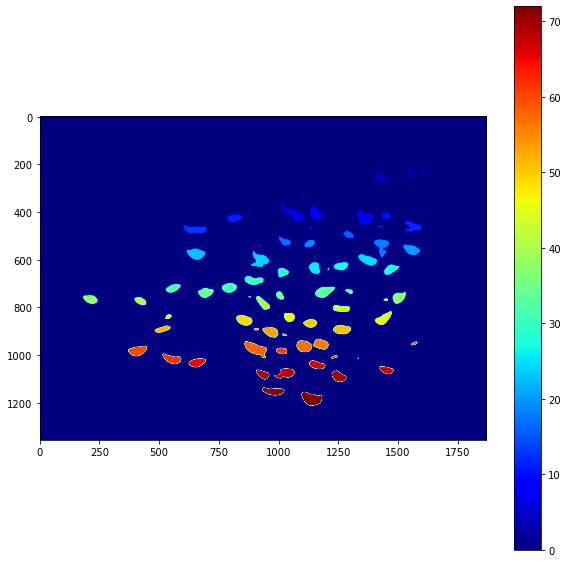

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
labels, num_labels = ndimage.label(thresholded)
plt.imshow(labels, cmap='jet')
plt.colorbar();

In [28]:
coms = ndimage.center_of_mass(thresholded, labels, index=range(1,num_labels))

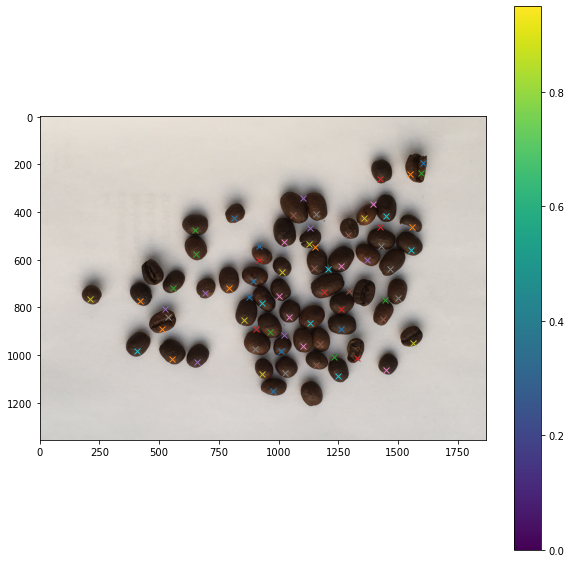

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
plt.imshow(beans)
plt.colorbar()
for com in coms:
    ax.plot([com[1]],[com[0]], 'x')
plt.savefig('bean-centers.png')